In [44]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


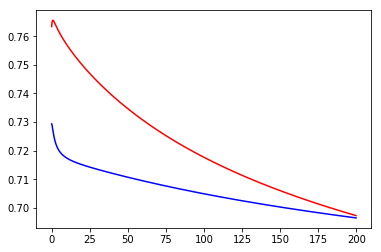

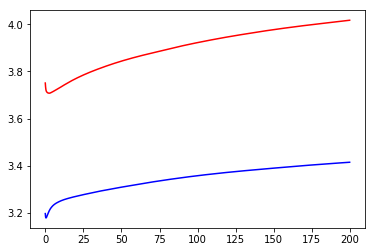

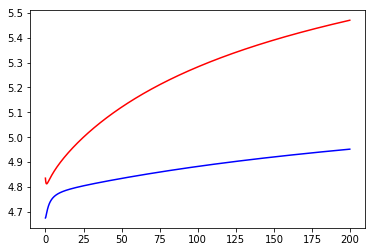

0.8
0.7656351052585065
2.6
3.7076535935331667
0.8
4.812657345965908


In [62]:
boston = datasets.load_boston()
X_train, X_val, y_train, y_val = train_test_split(boston.data, boston.target, train_size=0.8, random_state=1)


leng = 1000
alpha = np.linspace(0, 199.8, leng)

train_score_data = np.empty(leng, dtype=np.float)
val_score_data = np.empty(leng, dtype=np.float)

train_mae_data = np.empty(leng, dtype=np.float)
val_mae_data = np.empty(leng, dtype=np.float)

train_rmse_data = np.empty(leng, dtype=np.float)
val_rmse_data = np.empty(leng, dtype=np.float)

for i in range(leng) :
    clf = linear_model.Ridge(alpha = alpha[i])
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    testy = y_val
    
    predicted = clf.predict(boston.data)
    
    train_score_data[i] = clf.score(X_train, y_train)
    val_score_data[i] = clf.score(X_val, y_val)
    #mae = mean_absolute_error(Xtrain, y_train)
    # 平方根平均二乗誤差（RMSE）
    
    train_mae_data[i] = mean_absolute_error(y_train, y_train_pred)
    val_mae_data[i] = mean_absolute_error(y_val, y_val_pred)
    
    train_rmse_data[i] = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse_data[i] = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    
    """
    fig, ax = plt.subplots()
    
    print(train_score_data[i])
    print(val_score_data[i])
    
    ax.scatter(y_train, y_train_pred)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('predicted')

    ax.scatter(testy, y_val_pred)
    ax.set_xlabel('Measured')
    ax.set_ylabel('predicted')
    #plt.show()
    """

#print(train_score_data)
#print(val_score_data)

plt.plot(alpha, train_score_data, c='blue')
plt.plot(alpha, val_score_data, c='red')
plt.show()

plt.plot(alpha, train_mae_data, c='blue')
plt.plot(alpha, val_mae_data, c='red')
plt.show()

plt.plot(alpha, train_rmse_data, c='blue')
plt.plot(alpha, val_rmse_data, c='red')
plt.show()

print(alpha[np.argmax(val_score_data)])
print(val_score_data.max())

print(alpha[np.argmin(val_mae_data)])
print(val_mae_data.min())

print(alpha[np.argmin(val_rmse_data)])
print(val_rmse_data.min())

#plt.scatter(alpha, train_score_data, c='blue',marker='o',s=50)
#plt.scatter(alpha, val_score_data, c='red',marker='o',s=50)

0.7281501498115881
0.7654722963026931


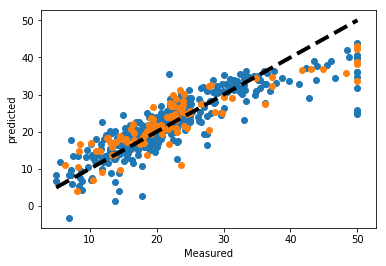

In [10]:
a = clf.coef_
b = clf.intercept_ 

print(a)
print(b)


[-1.11544191e-01  5.81486415e-02  1.18704847e-02  2.10174569e+00
 -1.81162743e+01  3.10895642e+00  3.23305706e-03 -1.47881954e+00
  3.02001740e-01 -1.12603260e-02 -9.72387505e-01  7.39741328e-03
 -5.46314771e-01]
41.88363814723297


In [14]:
#print(f"training dataに対しての精度: {clf.score(X_train, y_train):.2}")
#print(f"test set scoreに対しての精度: {clf.score(X_test, y_test):.2f}")

training dataに対しての精度: 0.73


NameError: name 'X_test' is not defined